ECS 171 Group Project: Group 17.
Group lead      Michael Pitts
                Albert Eo
                Pranay Mittal
                Arya Rajpal
                Jasjeet Rangi
                Nicholas Sulistio
                Alison Wu

UCI Heart dailure clinical records:
Data = https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records

Problem Statement:

    Medical information can be very overwhelming for a person at high risk of heart failure or disease. Doctors may inform patients that they are at high risk of developing complications or passing away due to heart failure. They then proceed to overwhelm patients with a list of every bodily metric with a complex list of numbers, chemicals and medical terms. Our product gives patients a straightforward game plan to attack a targeted set of health metrics in order to lower their chances for developing further complications. 


The intial stage of building our project is going to be exploritory data analysis, this will take part in 3 steps and have 2 goals.

The 3 steps will be:

    Understanding the data
    Cleaning the data.
    Analyzing variable relationships.

Our 2 goals will be:
        Weight and rank the relationships that lead to death.
        Find feature percentiles.

1) Understanding the data:
    Let us print of the head of our data as well as the shape of our data to see what is within and analyize what kinda of features we will be working with.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('heart_failure.csv')

print("Head: ")
print(df.head())

print(f"Shape: {df.shape}")

#set future polt size
plt.rcParams['figure.figsize'] = [10,5]



Head: 
    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2

We can see that we have a total of 13 features and 299 entries in the dataset. With some reasearch into each of the measures we have come to the conclusion that each metric provides a helpful insight into an individual's heart health and because of that no columns will be dropped.

Here is the list of each feature and thier corrisponding units/definition:
- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

We will now begin analyzing the relationship between variables, to being with this we will create a heat map and pairplot for the dataset's features. BEcause our goal is to classify people into risk catagories we have to add 4 new columns, hig, medium, low, and risk. High, Medium, and Low will be one hot encoddings used for training models, whereas risk will be a catigorical column used in the pair plot of exporitory data analysis. Lastly we will drop Death_event, and time because they will become baked into our data.

In [2]:
def label_high(row):
    if row['time'] <= 140 and row["DEATH_EVENT"] == 1:
        return 1
    elif row['time'] > 140 and row['DEATH_EVENT'] == 1:
        return -1
    elif row['time'] <= 140 and row['DEATH_EVENT'] == 0:
        return -1
    elif row['time'] > 140 and row['DEATH_EVENT'] == 0:
        return 0


df['high'] =  df.apply(lambda row: label_high(row), axis=1)

df_drop = df[(df.high == -1)]
df.drop(index=df_drop.index, inplace=True,axis=1)
df.shape

df = df.drop(['DEATH_EVENT'], axis=1)
df.shape


(194, 13)

<AxesSubplot:>

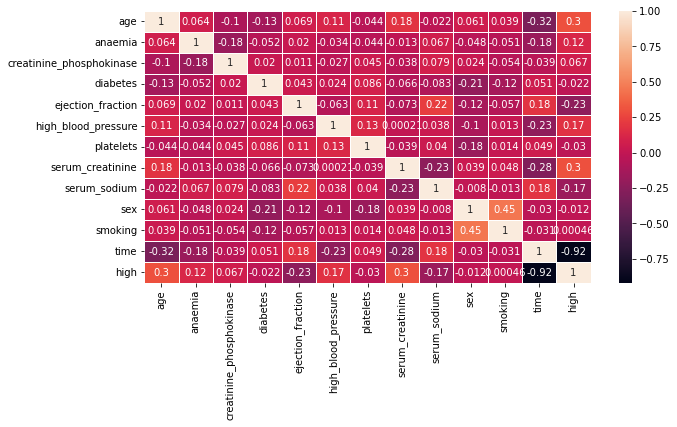

In [3]:
import seaborn as sns 

sns.heatmap(df.corr(), annot=True, linewidth=1)

We will drop all binary columns for this analysis and set hue = to sex inorder to see some of the relationships between medical measures and sex. This will inform us whether a seperate model needs to be used for each gender. 

Note that time was also dropped, this is because time represents the time until next hospital vist and we felt it was not pertinent to this pairplot.

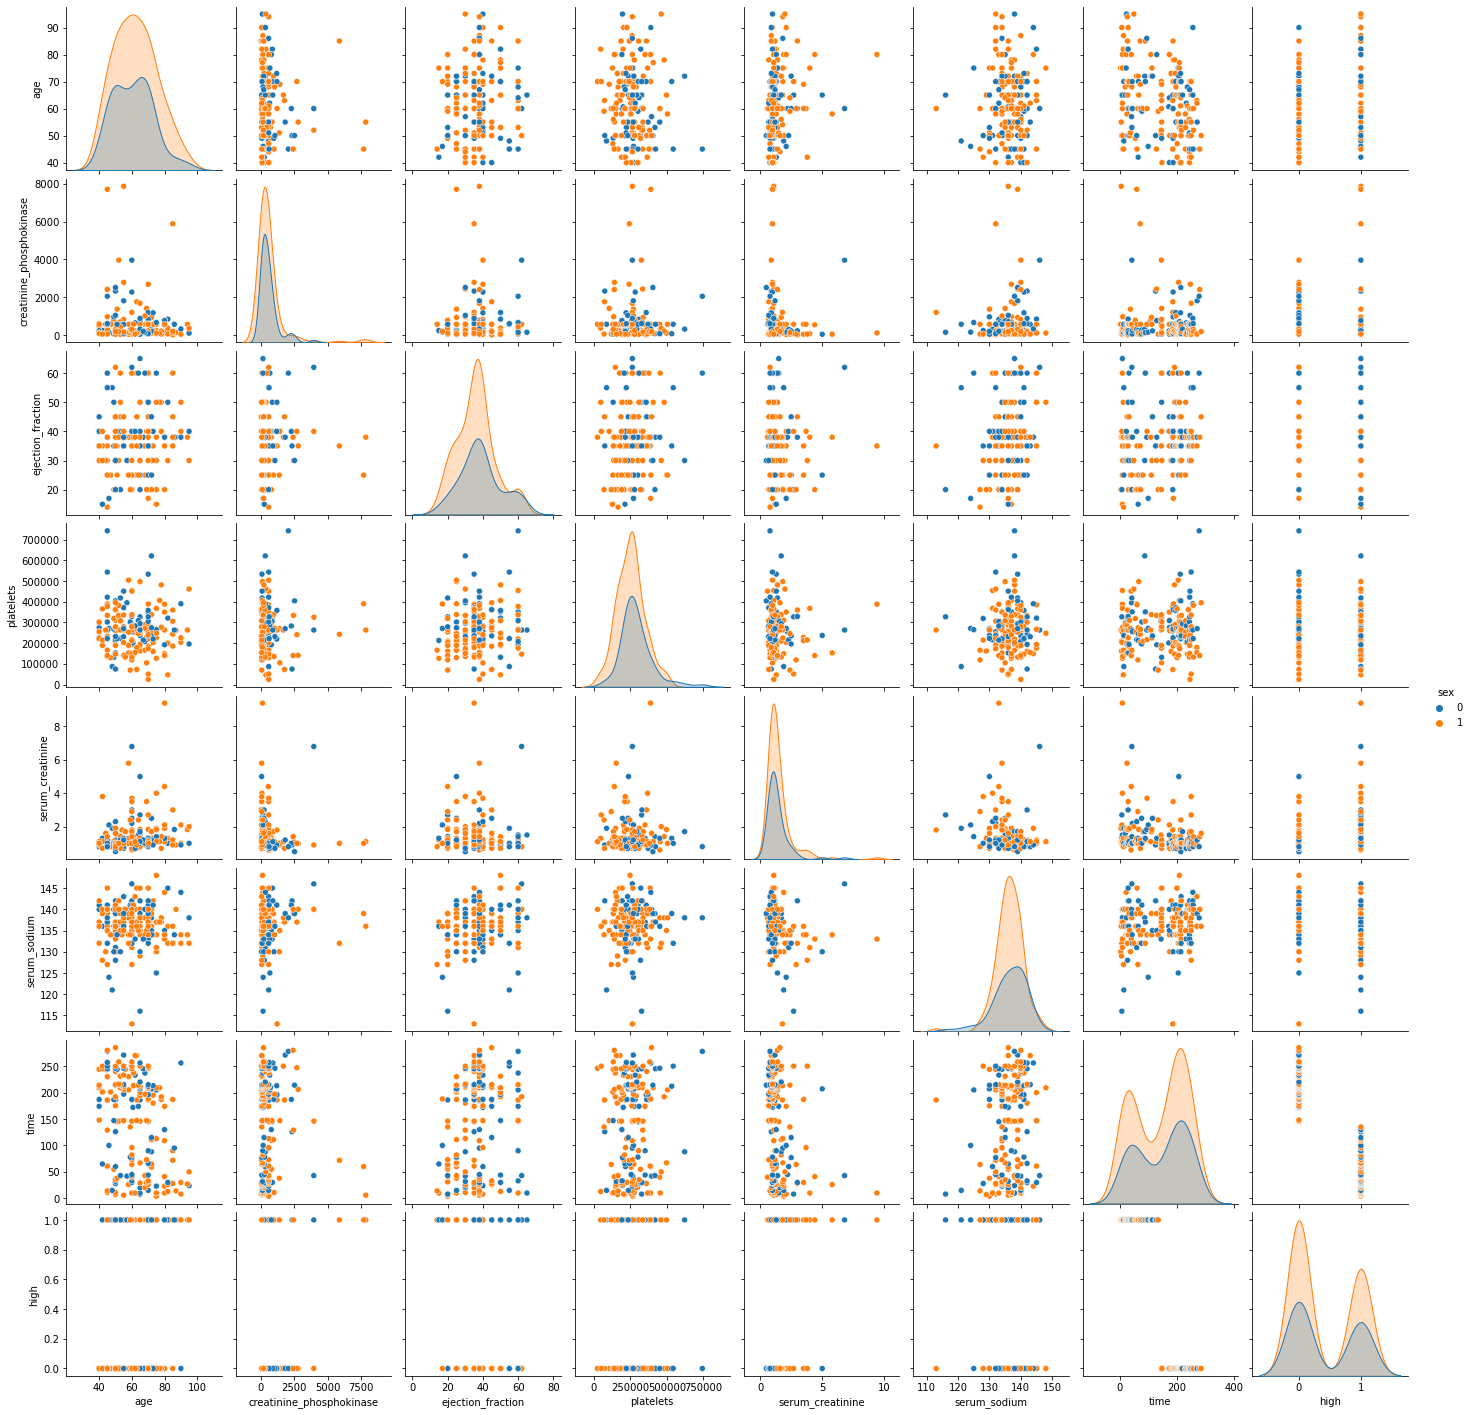

In [4]:
non_bool = df.drop(['diabetes', 'anaemia', 'high_blood_pressure', 'smoking'], axis=1)

sns.pairplot(non_bool, hue='sex')

From this pairplot we can clearly see that while the levels of each measure are in general high for men, that ratios between measures remain the same for both men and women. This can be seen with the fact that there is no relationship in which men and women create seperate discernible clusters.

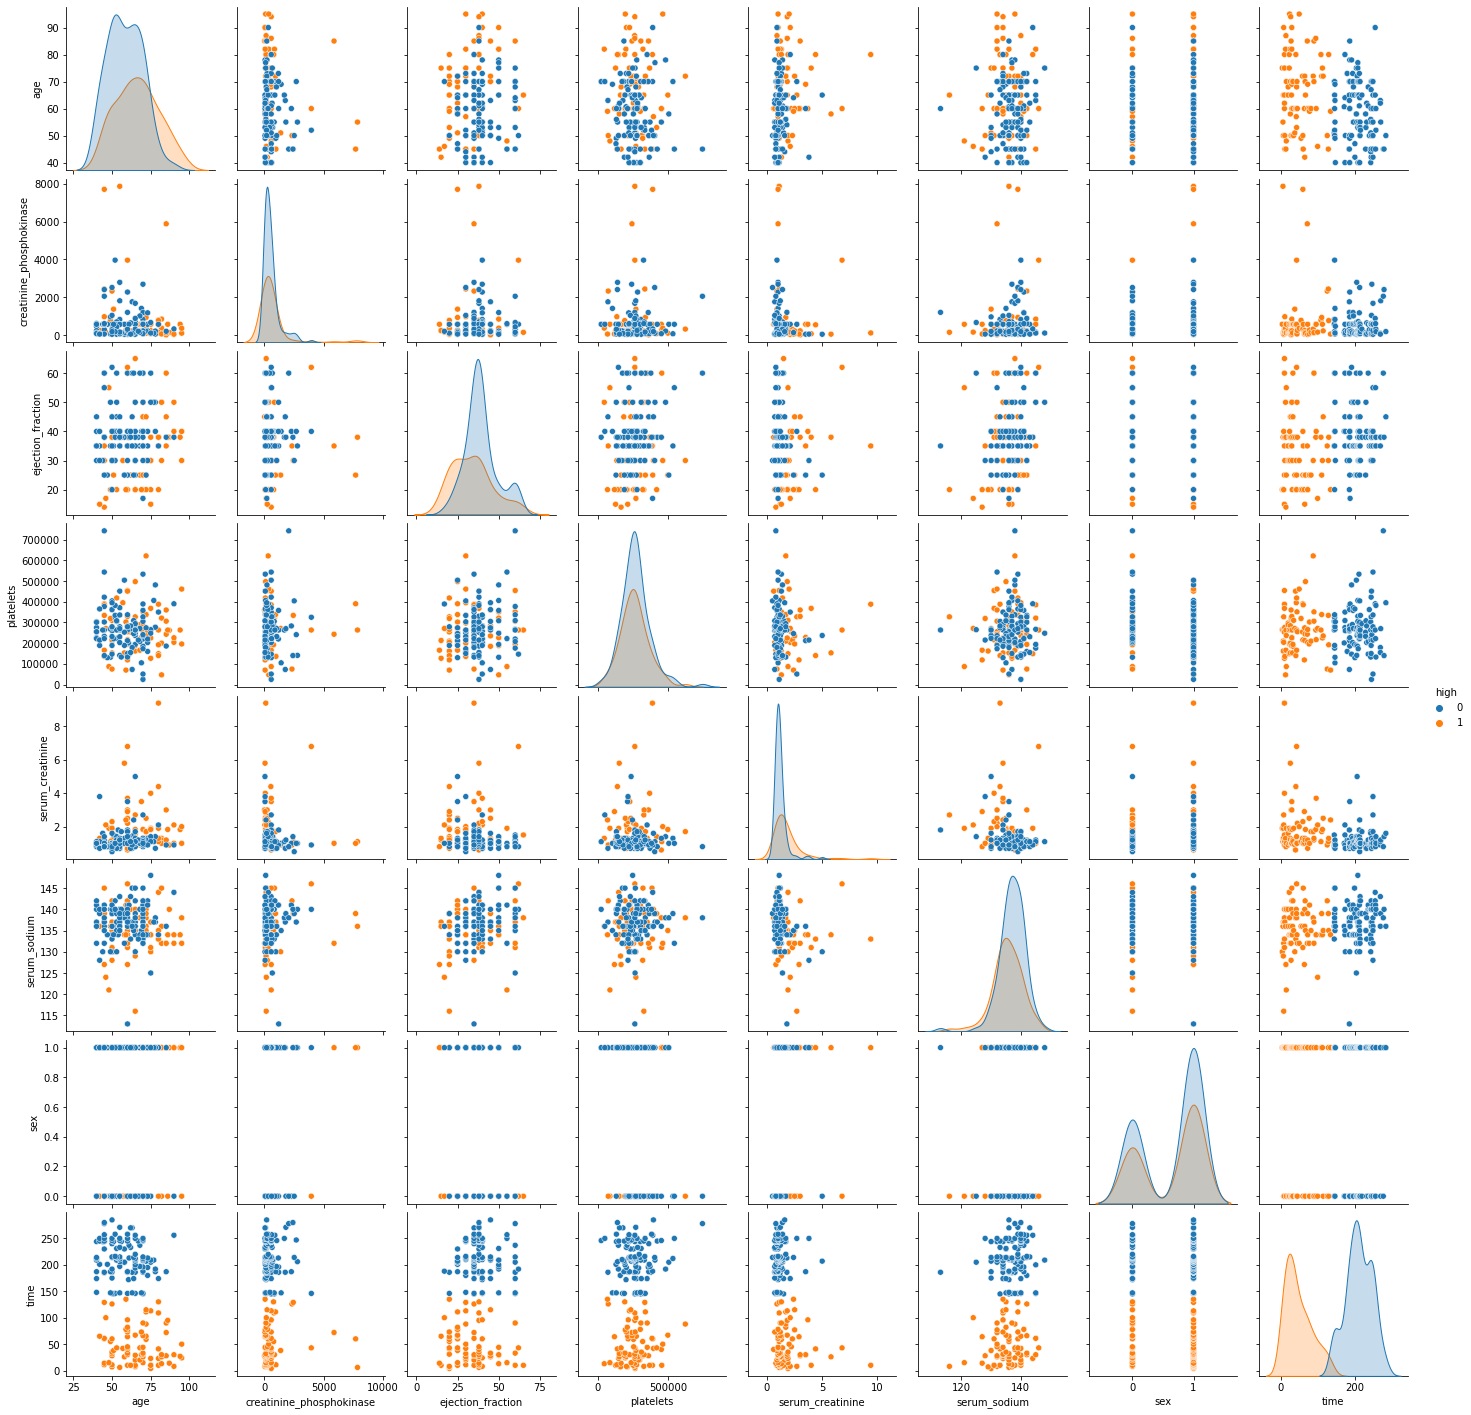

In [5]:
sns.pairplot(non_bool, hue='high', palette=["C0", "C1"])

Additionally we can look at the basic statistical data to see the feature averages and percentiles.

In [6]:
non_bool = non_bool.drop(['sex'], axis=1)
non_bool.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,high
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,61.637459,606.005155,36.927835,265292.930309,1.432577,136.340206,143.886598,0.412371
std,12.811766,1047.497979,11.164570,101462.555953,1.038604,4.774471,88.081495,0.493535
min,40.000000,23.000000,14.000000,25100.000000,0.500000,113.000000,4.000000,0.000000
25%,50.000000,123.250000,30.000000,204000.000000,1.000000,134.000000,46.250000,0.000000
50%,60.000000,251.500000,38.000000,263358.030000,1.100000,136.500000,177.500000,0.000000
75%,70.000000,582.000000,40.000000,308750.000000,1.500000,140.000000,214.000000,1.000000
max,95.000000,7861.000000,65.000000,742000.000000,9.400000,148.000000,285.000000,1.000000


From the pair plot we can see that there are no clear correclations, this means that we should do a clustering

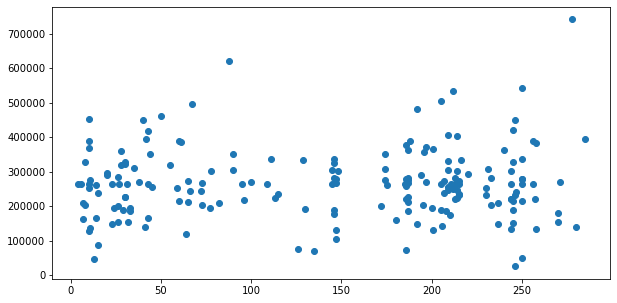

In [7]:
plt.scatter(df['time'], df['platelets'])

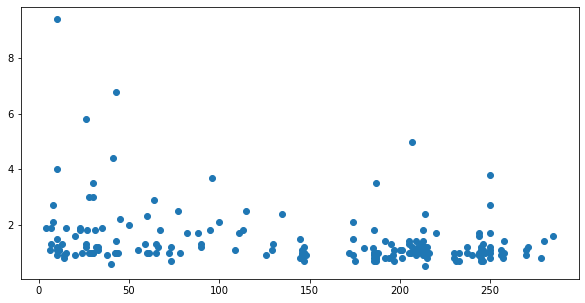

In [8]:
plt.scatter(df['time'], df['serum_creatinine'])

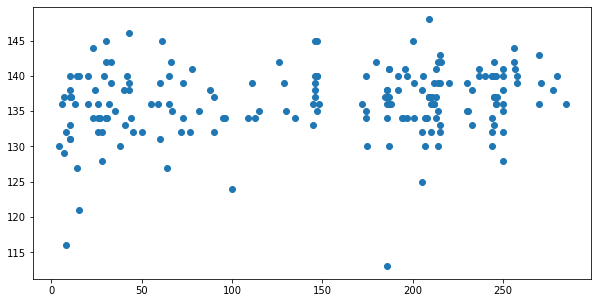

In [9]:
plt.scatter(df['time'], df['serum_sodium'])


Here we take a look at our two primary catagories to see if we have a large disparity between the amounts of each type of patient. We found that the number of low risk patients out numbers high risk patients by %17.5. This is an acceptable level of discrepancy. 

In [10]:
print(df['high'].value_counts())
df.shape


0    114
1     80
Name: high, dtype: int64


(194, 13)

In [11]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,high
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [17]:
# split dataframe into predictor set X and target y
X = df.drop("high", axis=1)
y = df.filter(["high"])

# Min-Max scaling
X = (X-X.min())/(X.max()-X.min())

In [18]:
# split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=8)

In [21]:
# create FFNN model using keras and tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from typing import List

# return FFNN model with specified parameters
def create_model(hl1_n: int, hl2_n: int, output_n: int, activation_fns: List[str], loss_fn: str, opt_alg: str, metric_l: List[str]):
    """
    Create a configured FFNN model and return it.
  
    Parameters:
    hl1_n (int): Number of nodes in hidden layer 1
    hl2_n (int): Number of nodes in hidden layer 2
    output_n (int): number of nodes in output layer
    activation_fns (List[str]): list of activation function to use, where activation_fns[0] is for hidden layer 1
    loss_fn (str): loss function (e.g. "mean_squared_error")
    opt_alg (str): optimization algorithm (e.g. 'sgd' is stochastic gradient descent)
    metric_l (List[str]): List of metrics to use (e.g. ["MeanSquaredError", "accuracy]

    Returns:
    FFNN model: artifical neural net configured using parameters
    """
    
    # Create a model step by step
    model = Sequential(name='classifier')

    # configure the layers
    layers = [
        Dense(hl1_n, activation=activation_fns[0], name="hidden_layer1"),
        Dense(hl2_n, activation=activation_fns[1], name="hidden_layer2"),
        Dense(output_n, activation=activation_fns[2], name="output_layer"),
    ]

    # Append the configured layers to the model
    for layer in layers:
        model.add(layer)

    # Configure model loss function, optimization algorithm (e.g. SGD), and metrics
    model.compile(loss=loss_fn,
                    optimizer=opt_alg,
                    metrics=metric_l)
                    #metrics=['MeanSquaredError', 'accuracy'])

    return model

In [22]:
# create model
ffnn_model = create_model(hl1_n=12, hl2_n=3, output_n=1, activation_fns=["sigmoid", "sigmoid", "sigmoid"],
                          loss_fn="mean_squared_error", opt_alg="sgd", metric_l=["accuracy"])

# set learning rate
from keras import backend
backend.set_value(ffnn_model.optimizer.learning_rate, 0.3)

2022-05-13 17:47:21.214900: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [25]:
# train the model
ffnn_model.fit(X_train, y_train, epochs=500, verbose=0)

In [27]:
# evaluate MSE and accuracy for predictions on training set
pred_train = ffnn_model.predict(X_train)
score, acc = ffnn_model.evaluate(X_train, y_train, verbose=0)
print('Training Error: %.3f' % score)
print('Training Accuracy: %.3f\n' % acc)

# evaluate MSE and accuracy for predictions on test set
score, acc = ffnn_model.evaluate(X_test, y_test, verbose=0)
print('Test Error: %.3f' % score)
print('Test Accuracy: %.3f\n' % acc)

nn_pred_test = ffnn_model.predict(X_test)

# print confusion matrix
# np.argmax() returns 1D array of indexes of the max value, which is the classification if interest
# https://stackoverflow.com/questions/63862386/how-to-fix-valueerror-classification-metrics-cant-handle-a-mix-of-multiclass-a
from sklearn import metrics
import numpy as np
print("Confusion Matrix")
print(metrics.confusion_matrix(np.argmax(y_test.to_numpy(), axis=1), np.argmax(nn_pred_test, axis=1)))
print()

# print classification report for precision and recall
from sklearn.metrics import classification_report
print("Classification report for precision and recall:")
print(classification_report(y_true=np.argmax(y_test.to_numpy(), axis=1), y_pred=np.argmax(nn_pred_test, axis=1)))

Training Error: 0.002
Training Accuracy: 1.000

Test Error: 0.020
Test Accuracy: 0.974

Confusion Matrix
[[39]]

Classification report for precision and recall:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39

    accuracy                           1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39



In [31]:
# train the model
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train.values.ravel()) # convert y_train to a 1D array required by NB fit function

GaussianNB()

In [32]:
# get model score from test set
nb_model.score(X_test, y_test)

0.9487179487179487

In [34]:
# print classification report for precision and recall
# False means not satisfied, True means is satisfied
from sklearn.metrics import classification_report
print("Classification report for precision and recall:")
print(classification_report(y_true=y_test, y_pred=nb_model.predict(X_test)))

Classification report for precision and recall:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        21
           1       1.00      0.89      0.94        18

    accuracy                           0.95        39
   macro avg       0.96      0.94      0.95        39
weighted avg       0.95      0.95      0.95        39



In [3]:
df["high"].value_counts()

0    114
1     80
Name: high, dtype: int64

In [11]:
# split dataframe into predictor set X and target y
X_svm = df.drop("high", axis=1)
y_svm = df["high"]

# split into training and test sets
X_svm_train, X_svm_test, y_train, y_test = train_test_split(X_svm, y_svm, test_size = 0.20, random_state=8)

In [12]:
# Scale data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_svm_train)
X_train_std = sc.transform(X_svm_train)
X_test_std = sc.transform(X_svm_test)

In [13]:
from sklearn import svm

# linear kernel
svc_lin = svm.SVC(kernel = 'linear')
svc_lin.fit(X_train_std, y_train)

SVC(kernel='linear')

In [14]:
# print classification report
print("LINEAR KERNEL: Classification report for precision and recall:")
print(classification_report(y_true=y_test, y_pred=svc_lin.predict(X_test_std)))

LINEAR KERNEL: Classification report for precision and recall:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        21
           1       1.00      0.89      0.94        18

    accuracy                           0.95        39
   macro avg       0.96      0.94      0.95        39
weighted avg       0.95      0.95      0.95        39



In [15]:
# rbf kernel
svc_rbf = svm.SVC(kernel = 'rbf')
svc_rbf.fit(X_train_std, y_train)

SVC()

In [16]:
# print classification reportand recall:")
print(classification_report(y_true=y_test, y_pred=svc_rbf.predict(X_test_std)))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93        21
           1       1.00      0.83      0.91        18

    accuracy                           0.92        39
   macro avg       0.94      0.92      0.92        39
weighted avg       0.93      0.92      0.92        39

